<a href="https://colab.research.google.com/github/Rafi-Sharkar/Numerical-Method/blob/main/Lab_Assignment_02_2131130.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/mirsazzathossain/CSE317-Lab/blob/main/Lab_Assignment_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### **Find the following integral using the simpson's 1/3 rule**

Simpson's 1/3 rule uses higher-order polynomials to approximate the integral of a function $f(x)$ over the interval $[a,b]$. For Example, if there is an extra point midway between $f(a)$ and $f(b)$, the three points can be connected with a parabola. The area under the parabola is an approximation of the integral of $f(x)$ over the interval $[a,b]$.

<center>
    <img src="./images/simpson.PNG" width="400" />
</center>

If we are given values of $f(x)$ at 3 points as $(x_0, f(x_0))$, $(x_1, f(x_1))$, and $(x_2, f(x_2))$ then we can estimate $f(x)$ using the Lagrange polynomial of degree 2:

$$
\begin{align*}
f(x) &\approx f(x_0) \frac{(x-x_1)(x-x_2)}{(x_0-x_1)(x_0-x_2)} + f(x_1) \frac{(x-x_0)(x-x_2)}{(x_1-x_0)(x_1-x_2)} + f(x_2) \frac{(x-x_0)(x-x_1)}{(x_2-x_0)(x_2-x_1)}
\end{align*}
$$

Now, as the area under the estimated curve is an approximation of the integral of $f(x)$ over the interval $[a,b]$, we can write the integral as:

$$
\begin{align*}
I &= \int_{a}^{b} f(x) dx \\
&\approx \int_{a}^{b} \left[f(x_0)\frac{(x-x_1)(x-x_2)}{(x_0-x_1)(x_0-x_2)} + f(x_1) \frac{(x-x_0)(x-x_2)}{(x_1-x_0)(x_1-x_2)} + f(x_2) \frac{(x-x_0)(x-x_1)}{(x_2-x_0)(x_2-x_1)} \right] dx
\end{align*}
$$

When $a = x_0$, $b = x_2$, $x_1 = \frac{a+b}{2}$, and $h = \frac{b-a}{2}$, we can simplify the integral to:

$$
\begin{align*}
    I &\approx \frac{h}{3} \left[ f(x_0) + 4f(x_1) + f(x_2) \right] \\
    &= (b-a) \frac{f(x_0) + 4f(x_1) + f(x_2)}{6}
\end{align*}
$$

We will use Simpson's 1/3 rule to approximate the integral of $f(x) = 0.2 + 25x - 200x^2 + 675x^3 - 900x^4 + 400x^5$ over the interval $[0, 0.8]$. Follow the steps below to approximate the integral using Simpson's 1/3 rule.

##### **Step 1: Define the function**

Define a function `f` that takes a single parameter `x` and returns the value of $f(x) = 0.2 + 25x - 200x^2 + 675x^3 - 900x^4 + 400x^5$ at `x`. Note that the function should be able to handle both scalar and vector inputs.


In [ ]:
# Write appropriate code
def f1(x):
  return .2 + 25*x - 200*(x**2) + 675*(x**3) -900*(x**4) + 400*(x**5)

# f1(.2)

##### **Step 2: Define a function to approximate the function $f(x)$ using Lagrange polynomial**

Define a function `lagrange` that takes four parameters `x0`, `x1`, `x2` and `x` and returns the value of the Lagrange polynomial of degree 2 at `x`. The function should be able to handle both scalar and vector inputs. Use the function `f` defined in Step 1 to evaluate the function at the given points.

In [ ]:
# write appropriate code
x0, x1, x2 = .1, .3, .6

def lagrange(x, x0, x1, x2):
  return (((x-x1)*(x-x2))/((x0-x1)*(x0-x2)))*f1(x0) + (((x-x0)*(x-x2))/((x1-x0)*(x1-x2)))*f1(x1) + (((x-x0)*(x-x1))/((x2-x0)*(x2-x1)))*f1(x2)

# l = lagrange(.2,x0,x1,x2)
# print(l)


##### **Step 3: Define the interval**
Define the interval as a numpy array of two elements, where the first element is the lower bound and the second element is the upper bound. Name the array `interval`.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Write appropriate code
interval = np.array([0, 0.8])

##### **Step 4: Plot the function and the approximated polynomial**

Plot the function $f(x)$ and the approximated polynomial using the function `lagrange` defined in Step 2. Use the interval defined in Step 3 as the x-axis. Also, plot the points $(x_0, f(x_0))$, $(x_1, f(x_1))$, and $(x_2, f(x_2))$ on the same plot. Fill the area under the approximated polynomial using numpy's `fill_between` function.

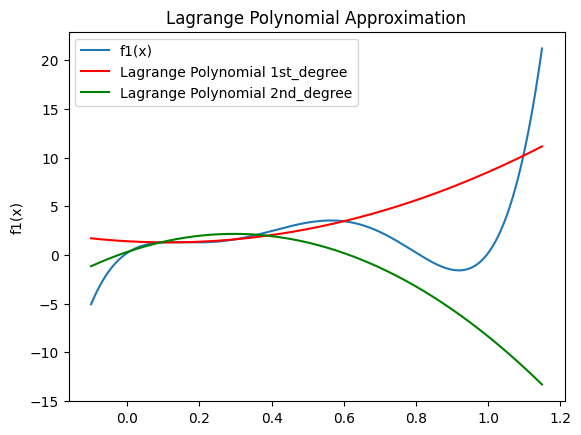

In [ ]:
# Write appropriate code
''' # methode_1
x = np.arange(-.1, 1.15, .001)

y = f1(x)

x0,x1,x2 = .1,.3,.6

yl1 = lagrange(x,x0,x1,x2)
yl2 = lagrange(x,x0**2,x1**2,x2**2)

plt.title("Lagrange Polynomial Approximation")
plt.plot(x,y, label="f1(x)")
plt.plot(x,yl1, label="Lagrange Polynomial 1st_degree", color="red")
plt.plot(x,yl2, label="Lagrange Polynomial 2nd_degree", color="green")

plt.legend()
plt.ylabel("f1(x)")
plt.show()
'''

import matplotlib.pyplot as plt

x0 = interval[0]
x2 = interval[1]
x1 = (x0 + x2) / 2

x_values = np.linspace(x0, x2, 400)
y_values = f1(x_values)
y_lagrange = lagrange(x0, x1, x2, x_values)

plt.plot(x_values, y_values, label='f(x)')
plt.plot(x_values, y_lagrange, label='Lagrange Polynomial', color='red')

##### **Step 5: Define a function to approximate the integral using Simpson's 1/3 rule**

Define a function `simpson` that takes a parameter `interval` and returns the approximate value of the integral of $f(x)$ over the interval `interval` using Simpson's 1/3 rule. You have to employ the following steps:

*   Calculate the midpoint of the interval. Store the value in a variable named `midpoint`.
*   Calculate the value of $f(x_0)$, $f(x_1)$, and $f(x_2)$, where $x_0 = a$, $x_1 = \frac{a+b}{2} = midpoint$, and $x_2 = b$. Store the values in variables named `f0`, `f1`, and `f2` respectively.
*   Calculate the approximate value of the integral using Simpson's 1/3 rule. Store the value in a variable named `I`.
*   Return the value of `I`.

In [ ]:
# Write appropriate code
def simpson(interval):
    midpoints = (interval[0] + interval[1]) / 2
    f_a = f1(interval[0])
    f_b = f1(interval[1])
    f_m = f1(midpoints)

    I = (interval[1] - interval[0]) / 6 * (f_a + 4 * f_m + f_b)
    return I

##### **Step 6: Approximate the integral using Simpson's 1/3 rule**

Call the function `simpson` with the interval `interval` as the parameter. Store the value returned by the function in a variable named `I`. Print the value of `I`. Then you should compute the integral analytically and find the absolute relative error between the two values. Print the absolute relative error.

In [ ]:
# Write appropriate code
I_actual = 1.640533
I = simpson(interval)
print(f'The numerical integration result is: {I:.2f}')
print(f"Relative error: {(abs(I_actual - I) / I_actual) * 100:.3f}%")

The numerical integration result is: 1.37
Relative error: 16.645%
